<a href="https://colab.research.google.com/github/Alamgir-JUST/Machine-Learning-Projects/blob/main/Ransomware_Detction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malware Attack Detection using Mahcine Learning**

In [1]:
import matplotlib.pyplot as plt
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load and Inspect Dataset**

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/Final_Dataset_without_duplicate.csv')


In [5]:
# Preview shape and column names
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Show first few rows
df.head()

Dataset loaded successfully.
Shape: (21752, 77)
Columns: ['md5', 'sha1', 'file_extension', 'EntryPoint', 'PEType', 'MachineType', 'magic_number', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'oem_identifier', 'address_of_ne_header', 'Magic', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion', 'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem', 'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'text_PointerToRelocations', 'text_PointerToLineNumbers', 'text_Characteristics', 'rdata_VirtualSize', 'rdata_VirtualAd

,md5,sha1,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
0,d5aa2b2506dd71b65307bb551a6a099d,62f4d55a1bb8396e493d7815dc44febed7161535,exe,0x108ec,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign,Benign,Benign
1,8d1178cec97f96a9ede3efe2f30ef30e,ca40945a4e35d48794a5e13aacf16b8ae1caddeb,exe,0x25cf9c,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign,Benign,Benign
2,c08d7afb7966f452cf5aa9283fe8880a,6f47b50480bea61ae4dfb75c12582990cc5ce770,exe,0x2a7e,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
3,3554a3a99e7ffb57552aedcb2520f1d2,8c3d5b506a8d55f42f4c83ead3e4341255d1acfc,exe,0x64ca0,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0004,...,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign,Benign,Benign
4,5be9511d42136df49d9501680e84109f,0a7d0c68c591db2f197b2169d226bebe6e9bdabe,exe,0x1b9ae,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign


In [7]:
df['Class'].value_counts()

,count
Class,
Benign,10876
Malware,10876


In [8]:
df['Category'].value_counts()

,count
Category,
Benign,10876
Ransomware,4762
RAT,2647
Stealer,2018
Trojan,1449


In [9]:
df['Family'].value_counts()


,count
Family,
Benign,10876
Phobos,550
Snake,527
NanoCore,520
Raccoon,518
Remcos,512
njRat,506
Dharma,505
Shade,504


In [11]:
# Drop identifier columns
drop_cols = ['md5', 'sha1', 'file_extension']

# Create df1 for 'Class' prediction
df1 = df.drop(columns=drop_cols + ['Category', 'Family'])
df1 = df1.select_dtypes(include=['int64', 'float64']).join(df['Class'])

# Create df2 for 'Category' prediction
df2 = df.drop(columns=drop_cols + ['Class', 'Family'])
df2 = df2.select_dtypes(include=['int64', 'float64']).join(df['Category'])

# Create df3 for 'Family' prediction
df3 = df.drop(columns=drop_cols + ['Class', 'Category'])
df3 = df3.select_dtypes(include=['int64', 'float64']).join(df['Family'])

print("df1, df2, df3 created successfully:")
print("df1 shape (Class):", df1.shape)
print("df2 shape (Category):", df2.shape)
print("df3 shape (Family):", df3.shape)


df1, df2, df3 created successfully:
df1 shape (Class): (21752, 19)
df2 shape (Category): (21752, 19)
df3 shape (Family): (21752, 19)


## **Binary Class Classification**


 Decision Tree Metrics:
Accuracy : 0.9903470466559412
Precision: 0.9889958734525447
Recall   : 0.9917241379310345
F1 Score : 0.990358126721763
Confusion Matrix:
 [[2152   24]
 [  18 2157]]

 KNN Metrics:
Accuracy : 0.9556423810618249
Precision: 0.959221501390176
Recall   : 0.9517241379310345
F1 Score : 0.955458112162474
Confusion Matrix:
 [[2088   88]
 [ 105 2070]]

 Random Forest Metrics:
Accuracy : 0.9931050333256722
Precision: 0.9890560875512996
Recall   : 0.9972413793103448
F1 Score : 0.9931318681318682
Confusion Matrix:
 [[2152   24]
 [   6 2169]]


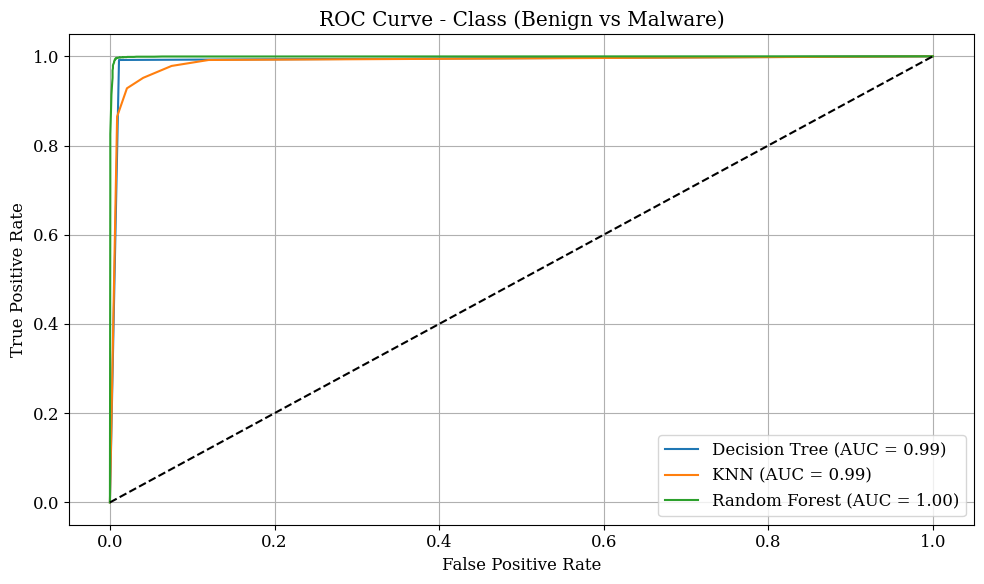

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Feature-label split
X = df1.drop(columns=['Class'])
y = df1['Class']

# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. Train, Predict, Evaluate
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 6. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class (Benign vs Malware)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Multiclass Classification (4 Class)**


 Decision Tree Metrics:
Accuracy : 0.9450700988278556
Precision (macro): 0.902261550570483
Recall (macro)   : 0.90586883854094
F1 Score (macro) : 0.9040116004550691
Confusion Matrix:
 [[2151   10    7    4    3]
 [   4  449   17   43   16]
 [   8   26  909    3    7]
 [   0   39    4  351   10]
 [   2   19    6   11  252]]

 KNN Metrics:
Accuracy : 0.9000229832222477
Precision (macro): 0.8591343271622636
Recall (macro)   : 0.8374010237289159
F1 Score (macro) : 0.8476896004410316
Confusion Matrix:
 [[2103   38   21    5    8]
 [  51  398   27   36   17]
 [  31   34  871    4   13]
 [  21   33   10  331    9]
 [  31   23   11   12  213]]

 Random Forest Metrics:
Accuracy : 0.9717306366352563
Precision (macro): 0.9540344749718619
Recall (macro)   : 0.9508049803821216
F1 Score (macro) : 0.9521426107300768
Confusion Matrix:
 [[2155   11    3    5    1]
 [   5  501    9   10    4]
 [   3   10  934    1    5]
 [   0   20    6  374    4]
 [   1   18    5    2  264]]


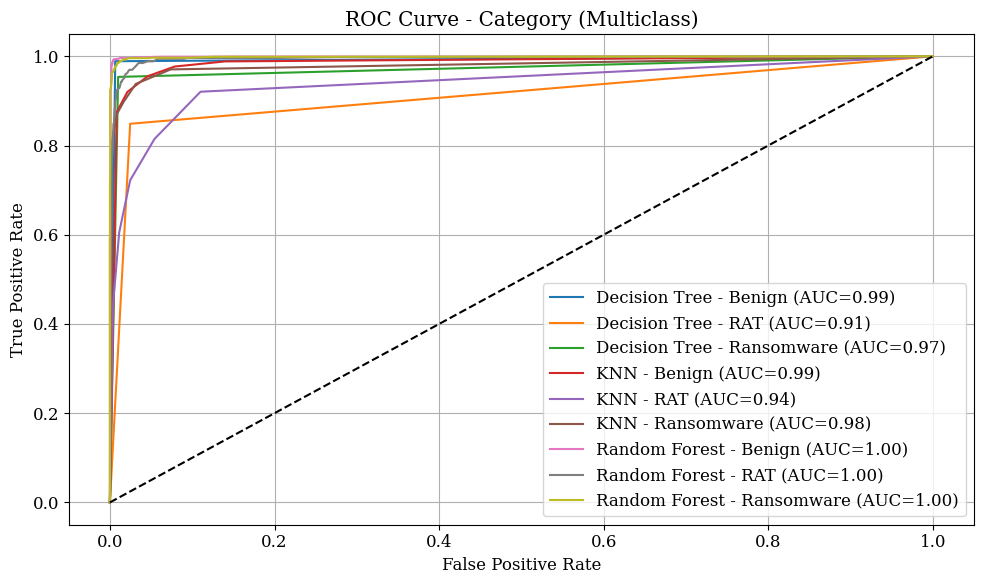

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. Feature-label split
X = df2.drop(columns=['Category'])
y = df2['Category']

# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# 3. One-hot encode for ROC-AUC (multiclass)
y_binarized = label_binarize(y_encoded, classes=range(len(class_names)))

# 4. Train-test split + scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 6. Train and Evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro)   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro) :", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC AUC (macro-average)
    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
    auc_score = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")

    # ROC curve (plot only first 3 classes to avoid clutter)
    for i in range(min(3, len(class_names))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC={auc(fpr, tpr):.2f})')

# 7. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Category (Multiclass)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Multiclass Classification (14 Class)**


 Decision Tree Metrics:
Accuracy : 0.9174902321305447
Precision (macro): 0.8493565765352235
Recall (macro)   : 0.8583556237468905
F1 Score (macro) : 0.8531060963251093
Confusion Matrix:
 [[  62    0    0    0    0    0    1    0    0    0    0    0    0    1
     0    0    0    0    0    1    0    0    0    2    0    0    0]
 [   0 2145    1    1    0    0    0    3    4    1    2    0    0    3
     1    0    2    2    2    3    0    1    0    0    3    0    2]
 [   0    0   58    0    0    0    1    0    0    0    1    0    0    0
     0    0    0    0    0    0    2    1    1    0    2    0    0]
 [   0    1    0   60    0    0    0    0    0    0    0    1    0    1
     0    0    2    0    0    0    0    0    0    0    1    0    1]
 [   0    0    0    0   96    0    0    0    0    0    0    0    0    0
     1    0    1    0    0    0    0    1    2    0    0    0    0]
 [   2    0    0    0    0   57    0    0    2    0    0    0    0    0
     0    0    0    0    0    2    2    

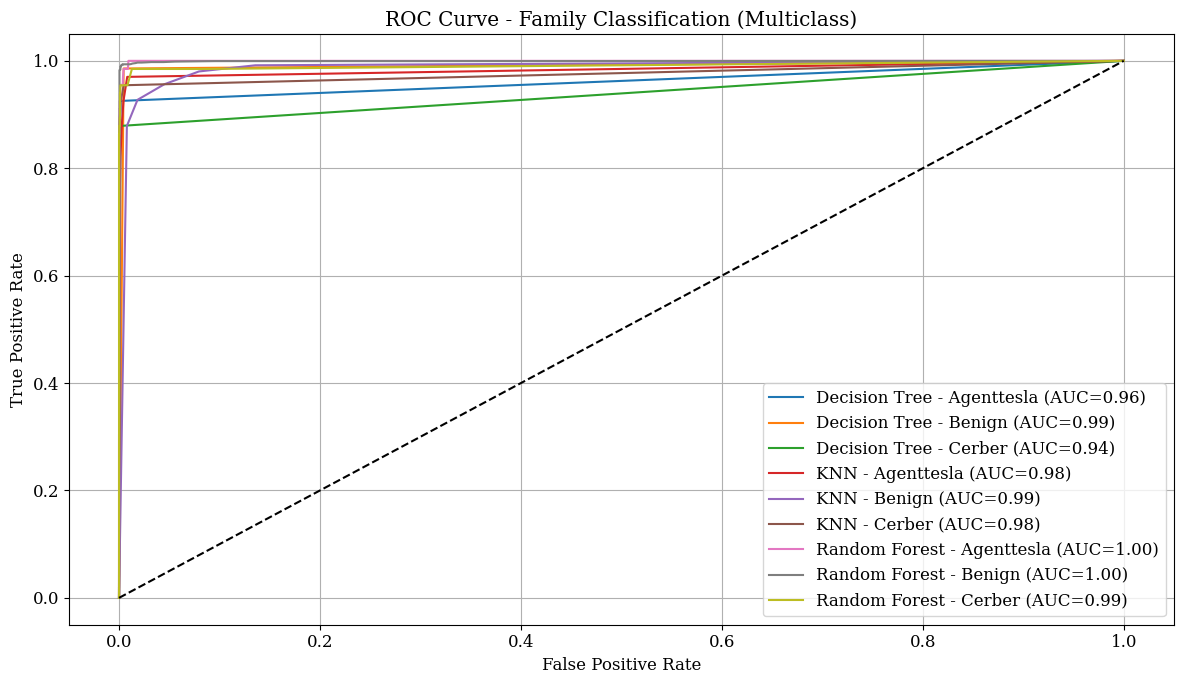

In [17]:
from sklearn.metrics import classification_report

# 1. Feature-label split
X = df3.drop(columns=['Family'])
y = df3['Family']

# 2. Label encode
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# 3. Binarize labels for ROC
y_binarized = label_binarize(y_encoded, classes=range(len(class_names)))

# 4. Train-test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 6. Train and evaluate
plt.figure(figsize=(12, 7))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro)   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro) :", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report (Top 5 Classes):\n", classification_report(
        y_test, y_pred, target_names=class_names, zero_division=0
    )[:800])  # Print shortened version

    # ROC for first 3 classes
    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
    for i in range(min(3, len(class_names))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC={auc(fpr, tpr):.2f})')

# 7. Plot ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Family Classification (Multiclass)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Thank You!!**